In [3]:
import os

drowsy_path = "Driver Drowsiness Dataset (DDD)/Drowsy"
non_drowsy_path = "Driver Drowsiness Dataset (DDD)/Non Drowsy"

def count_images(directory):
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif') 
    return sum(1 for filename in os.listdir(directory) if filename.lower().endswith(image_extensions))

# Count images in each directory
drowsy_count = count_images(drowsy_path)
non_drowsy_count = count_images(non_drowsy_path)

print(f"Number of images in Drowsy: {drowsy_count}")
print(f"Number of images in Non Drowsy: {non_drowsy_count}")


Number of images in Drowsy: 22348
Number of images in Non Drowsy: 19445


In [1]:
import random
import shutil
 
# Define paths
input_path = "Driver Drowsiness Dataset (DDD)"
drowsy_path = os.path.join(input_path, "Drowsy")
non_drowsy_path = os.path.join(input_path, "Non Drowsy")
 
# Create directories to save the sampled images
sampled_path = "Sampled_Dataset"
os.makedirs(sampled_path, exist_ok=True)
os.makedirs(os.path.join(sampled_path, "Drowsy"), exist_ok=True)
os.makedirs(os.path.join(sampled_path, "Non Drowsy"), exist_ok=True)
 
# Randomly sample 10,000 images from each class
num_samples = 10000
 
drowsy_files = os.listdir(drowsy_path)
non_drowsy_files = os.listdir(non_drowsy_path)
 
sampled_drowsy = random.sample(drowsy_files, num_samples)
sampled_non_drowsy = random.sample(non_drowsy_files, num_samples)
 
# Copy the sampled images to the new directories
for file in sampled_drowsy:
    shutil.copy(os.path.join(drowsy_path, file), os.path.join(sampled_path, "Drowsy", file))
 
for file in sampled_non_drowsy:
    shutil.copy(os.path.join(non_drowsy_path, file), os.path.join(sampled_path, "Non Drowsy", file))


In [4]:
drowsy_path = "Sampled_Dataset/Drowsy"
non_drowsy_path = "Sampled_Dataset/Non Drowsy"

def count_images(directory):
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif') 
    return sum(1 for filename in os.listdir(directory) if filename.lower().endswith(image_extensions))

# Count images in each directory
drowsy_count = count_images(drowsy_path)
non_drowsy_count = count_images(non_drowsy_path)

print(f"Number of images in Drowsy: {drowsy_count}")
print(f"Number of images in Non Drowsy: {non_drowsy_count}")

Number of images in Drowsy: 10000
Number of images in Non Drowsy: 10000


In [5]:
import splitfolders

#Define paths
input_path = "Sampled_Dataset"
output_path = "Dataset_split"

# Split the dataset
splitfolders.ratio(
    input_path,
    output=output_path,
    seed=42,
    ratio=(0.7,0.15,0.15),
    group_prefix=None,
    move=False
)

Copying files: 20000 files [00:18, 1102.21 files/s]


In [7]:
import random

# Define paths
test_dir = 'Dataset_split/test'
drowsy_dir = os.path.join(test_dir, 'Drowsy')
non_drowsy_dir = os.path.join(test_dir, 'Non Drowsy')
all_dir = os.path.join(test_dir, 'all')

# Create the 'all' directory if it doesn't exist
os.makedirs(all_dir, exist_ok=True)

# Move images from Drowsy directory to the 'all' directory
for filename in os.listdir(drowsy_dir):
    src_path = os.path.join(drowsy_dir, filename)
    dst_path = os.path.join(all_dir, f"drowsy_{filename}")
    shutil.move(src_path, dst_path)

# Move images from Non Drowsy directory to the 'all' directory
for filename in os.listdir(non_drowsy_dir):
    src_path = os.path.join(non_drowsy_dir, filename)
    dst_path = os.path.join(all_dir, f"non_drowsy_{filename}")
    shutil.move(src_path, dst_path)

# Remove the now-empty Drowsy and Non Drowsy directories
os.rmdir(drowsy_dir)
os.rmdir(non_drowsy_dir)

# Shuffle the images in the 'all' directory
all_files = os.listdir(all_dir)
random.shuffle(all_files)

for i, filename in enumerate(all_files):
    src_path = os.path.join(all_dir, filename)
    dst_path = os.path.join(all_dir, f"image_{i:05d}_{filename}")
    os.rename(src_path, dst_path)

print("Images have been combined into the 'all' directory and shuffled.")

Images have been combined into the 'all' directory and shuffled.


In [1]:
import os

# Define the directory
root_dir = "Dataset_split"

# Function to count images in a directory
def count_images_in_directory(directory):
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')
    return sum(1 for filename in os.listdir(directory) if filename.lower().endswith(image_extensions))

image_counts = {'train': {}, 'val': {}, 'test': {}}

for split in ['train', 'val', 'test']:
    split_dir = os.path.join(root_dir, split)
    
    # Iterate over each class within the split
    for class_name in os.listdir(split_dir):
        class_dir = os.path.join(split_dir, class_name)
        if os.path.isdir(class_dir):
            count = count_images_in_directory(class_dir)
            image_counts[split][class_name] = count

for split, classes in image_counts.items():
    print(f"Counts in {split} directory:")
    for class_name, count in classes.items():
        print(f"  {class_name}: {count} images")


Counts in train directory:
  Drowsy: 7000 images
  Non Drowsy: 7000 images
Counts in val directory:
  Drowsy: 1500 images
  Non Drowsy: 1500 images
Counts in test directory:
  all: 3000 images


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define paths
train_dir = 'Dataset_split/train'
test_dir = 'Dataset_split/test'
val_dir = 'Dataset_split/val'


# Data generators
train_data_gen = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

valid_data_gen = ImageDataGenerator(
    rescale=1 / 255.0
)

test_data_gen = ImageDataGenerator(
    rescale=1 / 255.0,
)

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary'
)

valid_generator = valid_data_gen.flow_from_directory(
    directory="Dataset_split/val",
    target_size=(224, 224),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=32,
    shuffle=False
)

test_generator = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    shuffle=False
)

for data_batch, labels_batch in train_generator:
    print("Batch of data shape:", data_batch.shape)
    print("Batch of labels shape:", labels_batch.shape)
    break  

Found 14000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Found 3000 images belonging to 1 classes.
Batch of data shape: (32, 224, 224, 1)
Batch of labels shape: (32,)


In [5]:
# Check class indices 
print("Training class indices:", train_generator.class_indices)
print("Validation class indices:", valid_generator.class_indices)
print("Test class indices:", test_generator.class_indices)

Training class indices: {'Drowsy': 0, 'Non Drowsy': 1}
Validation class indices: {'Drowsy': 0, 'Non Drowsy': 1}
Test class indices: {'all': 0}


Batch of data shape: (32, 224, 224, 1)
Batch of labels shape: (32,)


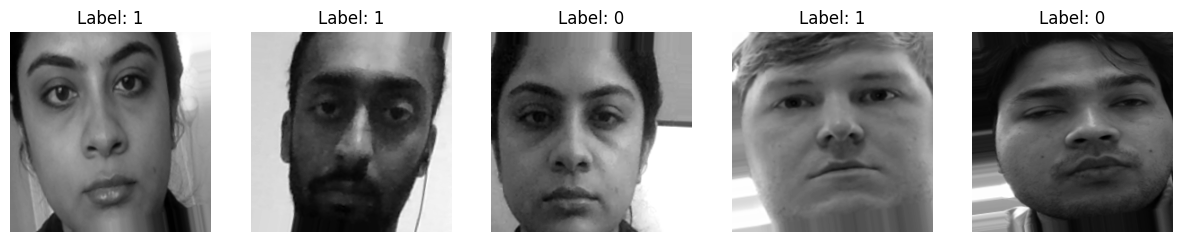

In [10]:
import matplotlib.pyplot as plt

for data_batch, labels_batch in train_generator:
    print("Batch of data shape:", data_batch.shape)
    print("Batch of labels shape:", labels_batch.shape)
    
    # Display a few images from the batch
    num_images_to_display = 5
    plt.figure(figsize=(15, 5))
    
    for i in range(num_images_to_display):
        ax = plt.subplot(1, num_images_to_display, i + 1)
        plt.imshow(data_batch[i].squeeze(), cmap='gray')
        plt.title(f"Label: {int(labels_batch[i])}")
        plt.axis("off")
    
    plt.show()
    break

# lable 1 = non drowsy
# label 0 = drowsy